In [18]:
from PIL import Image
from pipeline import pipeline, segmentation_filter, user_palette_classification_filter
from utils import segmentation_labels, utils
from models import dataset, config
from sklearn.model_selection import train_test_split
import random
import torchvision.transforms as T
import matplotlib.pyplot as plt
from palette_classification import color_processing, palette
import glob

In [19]:
# fetch test dataset
n_classes = len(segmentation_labels.labels)
dataset_path = config.DATASET_PATH
img_paths, label_paths = dataset.get_paths(dataset_path, file_name=config.DATASET_INDEX_NAME)
_, X_test, _, Y_test = train_test_split(img_paths, label_paths, test_size=0.20, random_state=99, shuffle=True)

# define filters
sf = segmentation_filter.SegmentationFilter('local')

# compose pipeline
pl = pipeline.Pipeline()
pl.add_filter(sf)

index(input)=2056


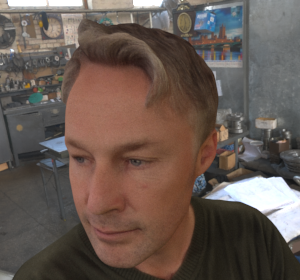

In [20]:
# take random image from test dataset
rnd = False
i_suggested = 2056
i = random.randint(0, len(X_test) - 1) if rnd is True else i_suggested
input = Image.open(X_test[i]).convert('RGB')
print(f'index(input)={i}')
input

In [21]:
# execute pipeline
img, masks = pl.execute(input)

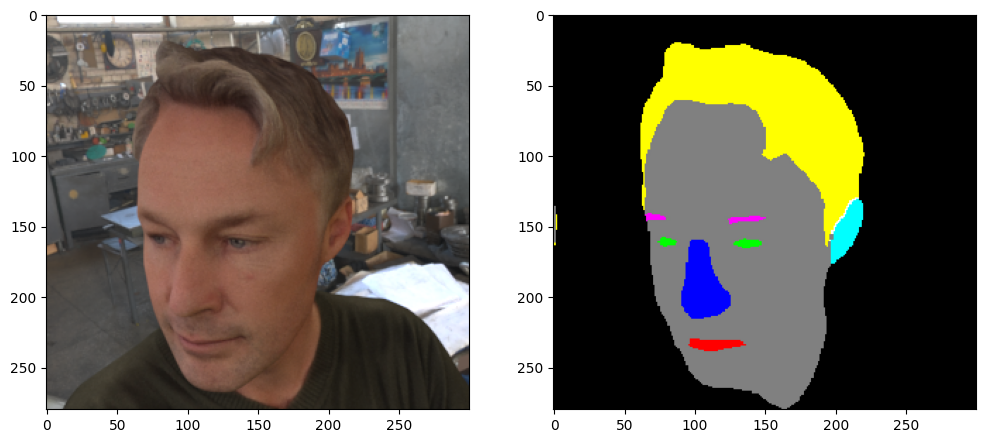

In [22]:
# show results   
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(utils.from_DHW_to_HWD(img))
plt.subplot(1, 2, 2)
plt.imshow(utils.from_DHW_to_HWD(color_processing.colorize_segmentation_masks(masks, segmentation_labels.labels)))

In [23]:
# define additional filters
palettes_dir = 'palette_classification/palettes/'
example_images_dir = 'palette_classification/example_images/'
palette_filenames = glob.glob(palettes_dir + '*.csv')
reference_palettes = [palette.PaletteRGB().load(
    palette_filename.replace('\\', '/'), header=True) for palette_filename in palette_filenames]
upcf = user_palette_classification_filter.UserPaletteClassificationFilter(reference_palettes)

# add additional filters to pipeline
pl.add_filter(upcf)

In [24]:
# execute pipeline
user_palette = pl.execute(input)

autumn


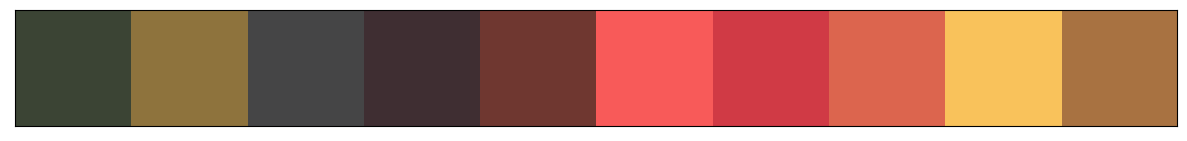

In [25]:
# show results   
print(user_palette.description())
user_palette.plot(tile_size=15)